# QUESTION: The Tipping Problem

Input: \
Service rate - poor, average, good \
Food quality rate - poor, average, good 

Output: \
Tip - low, medium, high 

Rules: \
IF the service was poor or the food quality was poor, THEN the tip will be low. \
IF the service was average, THEN the tip will be medium. \
IF the service was good or the food quality was good, THEN the tip will be high.

Q: How many tip should you give to the restaurant if the service is rated 9.8 out of 10 and the food quality is rated 6.5 out of 10?

## 1. Install scikit-fuzzy package & libraries

In [1]:
# install fuzzy package
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## 2. Declare fuzzy variable and membership function

In [3]:
# new Antecedent/Consequent objects hold universe variables and membership functions

service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')

tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

## 3. Create fuzzy membership function for Service

D:\Installation\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


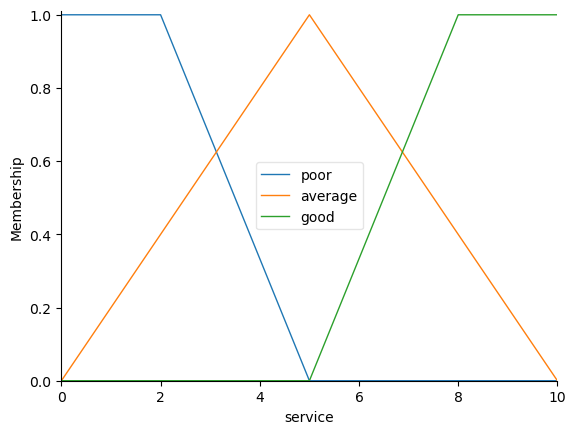

In [4]:
# create membership function for service
service['poor'] = fuzz.trapmf(service.universe, [0, 0, 2, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trapmf(service.universe, [5, 8, 10, 11])

# visualize plot generated 
service.view()

## 4. Create fuzzy membership function for Quality

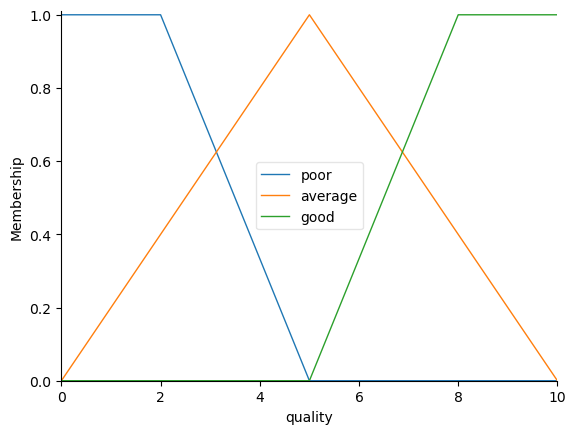

In [5]:
# create membership function for quality
quality['poor'] = fuzz.trapmf(quality.universe, [0, 0, 2, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trapmf(quality.universe, [5, 8, 10, 11])

# visualize plot generated 
quality.view()

## 5. Create fuzzy membership function for Tip

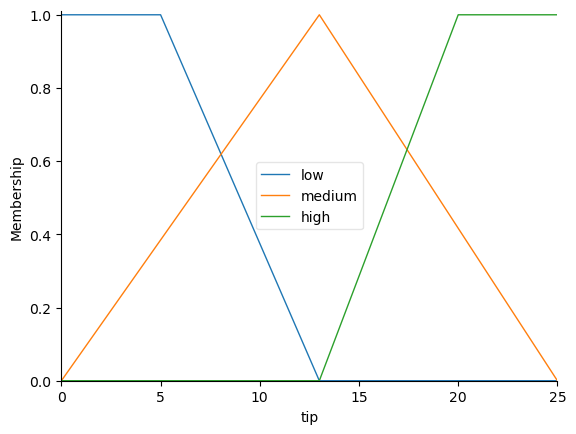

In [6]:
# custom membership function for tip
tip['low'] = fuzz.trapmf(tip.universe, [0, 0, 5, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trapmf(tip.universe, [13, 20, 26, 26])

# visualize plot generated 
tip.view()

## 6. Construct fuzzy rules

In [7]:
# create rules
rule1 = ctrl.Rule(service['poor'] | quality['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

## 7. Defuzzification

Recommended tip: 19.71052951773427


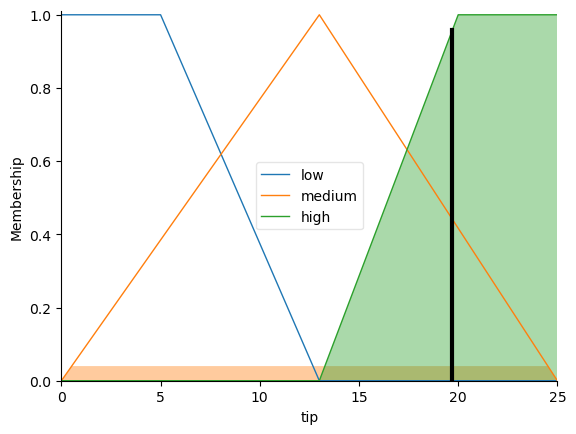

In [8]:
tipping.input['service'] = 9.8
tipping.input['quality'] = 6.5
tipping.compute()

print("Recommended tip:", tipping.output['tip'])
tip.view(sim=tipping)